In [4]:
import os
import sys
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set(style="whitegrid")
%matplotlib inline

In [5]:
df_path = "data/cleaned_diabetic_data.csv"

try:
    df = pd.read_csv(df_path)
    print("Dataset loaded from:", df_path)
except Exception as e:
    raise RuntimeError(f"Could not load {df_path}. Error: {e}")

Dataset loaded from: data/cleaned_diabetic_data.csv


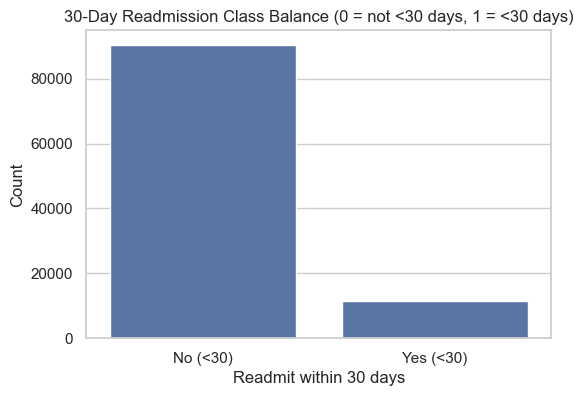

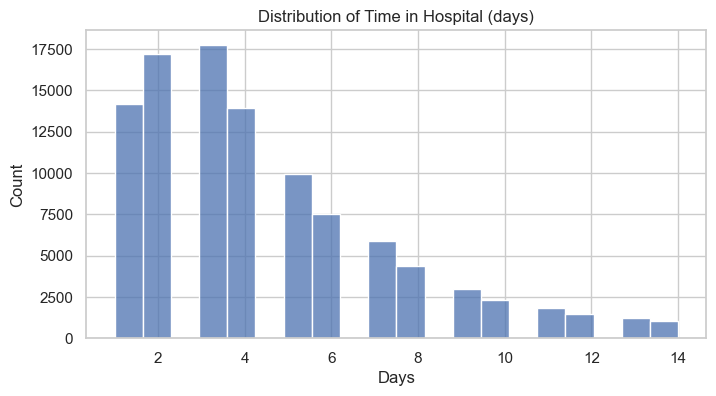

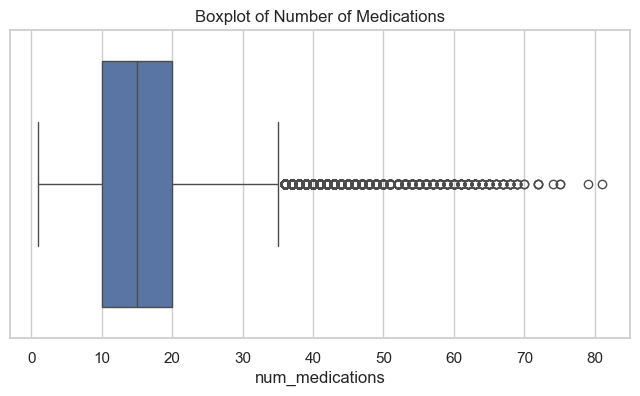

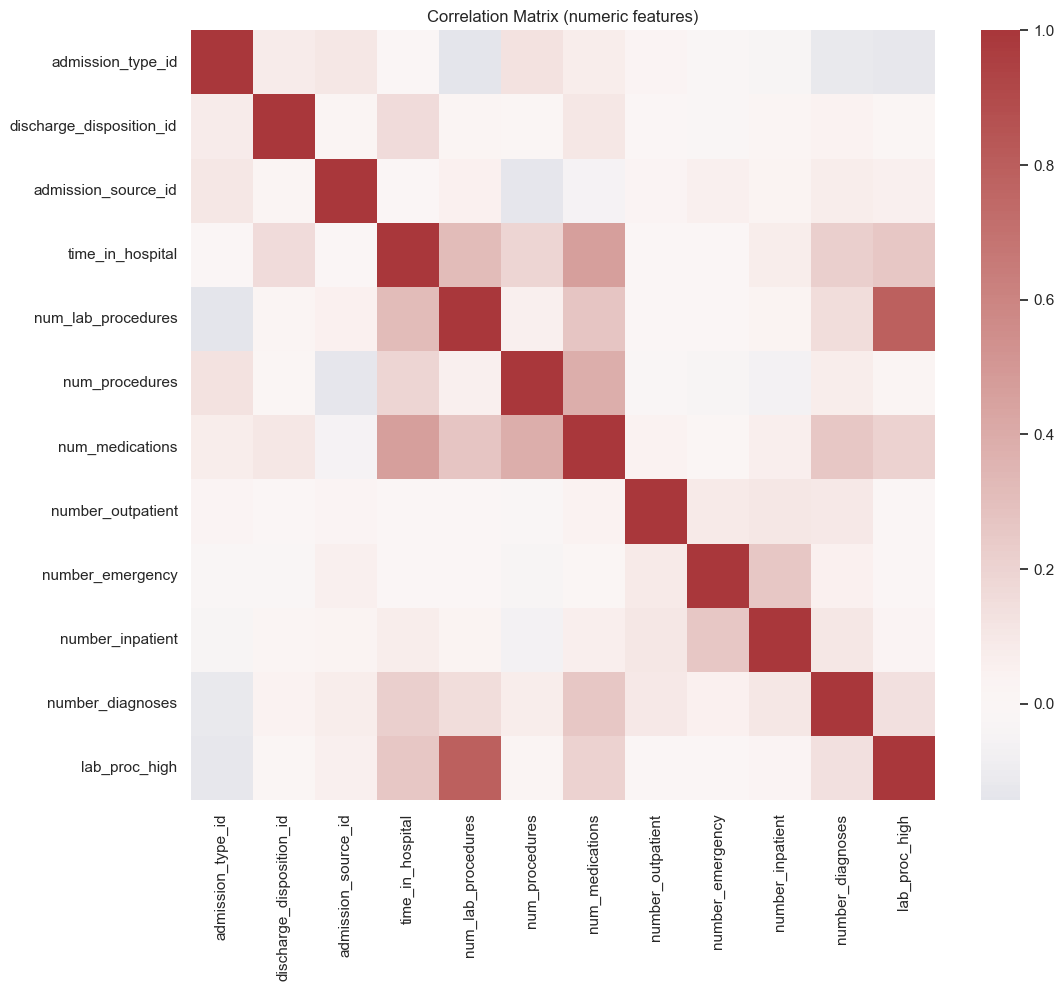

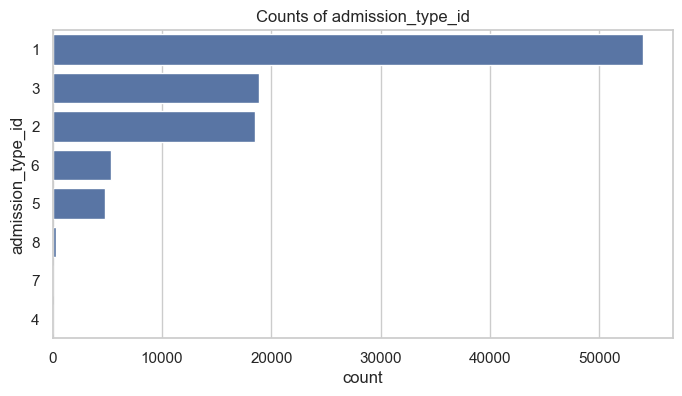

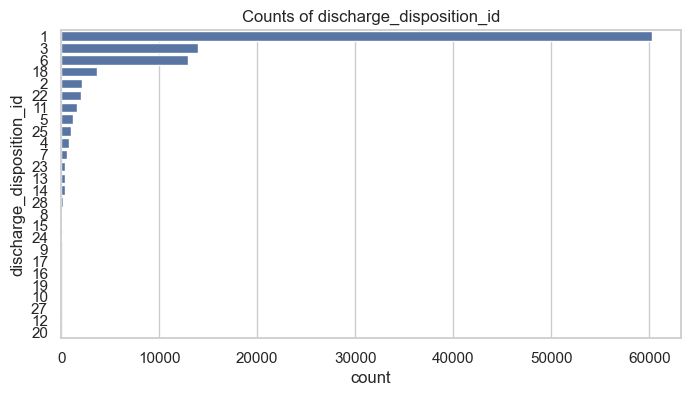

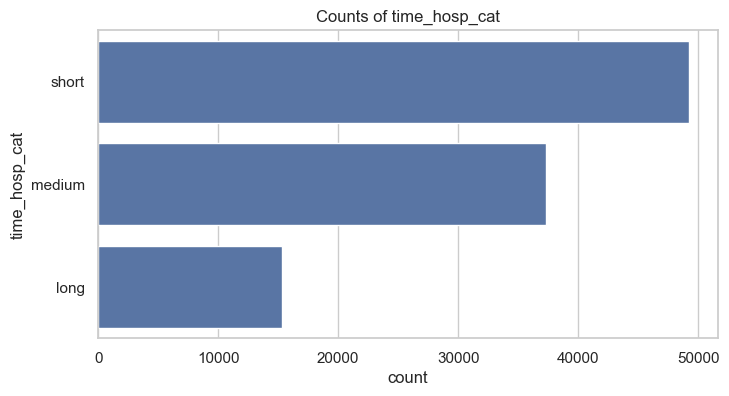

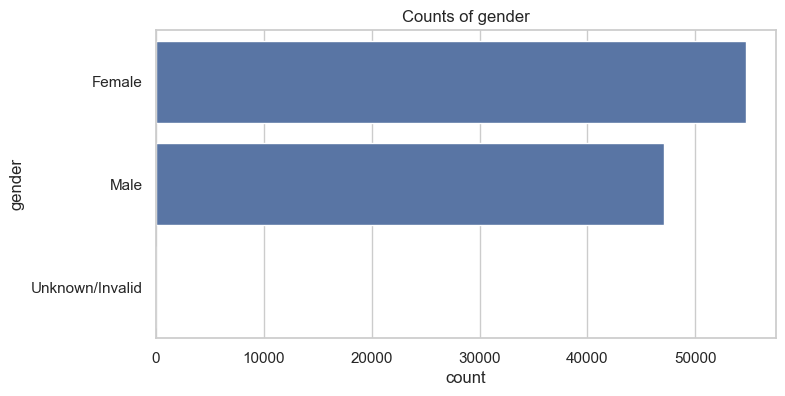

In [6]:
# 1) Class balance
plt.figure(figsize=(6,4))
sns.countplot(x='readmit_30d', data=df)
plt.title('30-Day Readmission Class Balance (0 = not <30 days, 1 = <30 days)')
plt.xlabel('Readmit within 30 days')
plt.ylabel('Count')
plt.xticks([0,1], ['No (<30)', 'Yes (<30)'])
plt.show()

# 2) Distribution - time_in_hospital
if 'time_in_hospital' in df.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df['time_in_hospital'], bins=20, kde=False)
    plt.title('Distribution of Time in Hospital (days)')
    plt.xlabel('Days')
    plt.show()

# 3) Boxplot - num_medications
if 'num_medications' in df.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df['num_medications'])
    plt.title('Boxplot of Number of Medications')
    plt.show()

# 4) Correlation heatmap (numeric subset)
num_df = df.select_dtypes(include=[np.number]).drop(columns=['readmit_30d'], errors='ignore')
plt.figure(figsize=(12,10))
corr = num_df.corr()
sns.heatmap(corr, cmap='vlag', center=0, annot=False)
plt.title('Correlation Matrix (numeric features)')
plt.show()

# 5) Categorical counts: admission_type_id or discharge_disposition_id if present
for col in ['admission_type_id', 'discharge_disposition_id', 'time_hosp_cat', 'gender']:
    if col in df.columns:
        plt.figure(figsize=(8,4))
        sns.countplot(y=col, data=df, order=df[col].value_counts().index)
        plt.title(f'Counts of {col}')
        plt.show()
